## Esercizo 1
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``Dati0.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Dati0.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import RisolviSis as rs
dati = loadmat('Dati0.mat')
A = dati["A"]
b = dati["b"]

In [3]:
#da centinaia in poi la matrice è di grandi dimensioni
print(A.shape)
#trattino dove c'è un elemento != 0, quindi si può vedere se è sparsa
#plt.spy(A)
#Posso anche calcolare il rapporto tra numeroZeri e il quadrato della dimensione(quadrata)
print(np.count_nonzero(A)/(A.shape[0]**2))

(400, 400)
0.012


In [4]:
def gauss_seidel(A,b,x0,toll,itmax):
    #Le funzioni possono vedere le variabili del main, ma non  modificarle
    n = A.shape[0]  #n = numero righe di A
    d = np.diag(A)  #vettore diagonale di A
    D = np.diag(d)  #costruisce la matrice che ha sulla diagonale il vettore d
    E = np.tril(A, -1)  #matrice triangolare inferiore, partendo dalla sottodiagonale
    F = np.triu(A, 1)  #matrice triangolare superiore, partendo dalla sopradiagonale
    M = D+E
    invM = np.linalg.inv(M)
    N = -F
    #controllo raggio spettrale per vedere se converge e in tal caso alla soluzione
    T = np.dot(invM, N)  #T=invM*N ERRORE!!! Perchè non è il prodotto scalare
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))  #Come fare la norma infinito
    print("Raggio spettrale: ", raggiospettrale)
    
    it = 0
    errore = 1000
    err_vet = []
    while it <= itmax and errore >= toll:
        x, flag = rs.Lsolve(M, b+N@x0)
        errore = np.linalg.norm(x-x0)/np.linalg.norm(x)
        err_vet.append(errore)
        x0 = x.copy()  #IMPORTANTE!!!
        it = it + 1
    return x, it, err_vet

In [5]:
def conjugate_gradient(A,b,x0,itmax,tol):
    m,n = A.shape
    if m != n:
        print("Matrice non quadrata")
        return [],[],[],[]
    
    x = x0
    r = A@x -b
    p = -r
    nb = np.linalg.norm(b)  #default norma 2
    errore = np.linalg.norm(r)/nb
    vec_sol = []
    vec_sol.append(x)
    vec_err = []
    vec_err.append(errore)
    
    it = 0
    while errore>=tol and it<=itmax :
        it = it + 1
        Ap = A@p
        rTr = np.dot(r.T, r)
        alpha = rTr / np.dot(p.T, Ap)
        x = x + alpha*p
        vec_sol.append(x)
        r = r + alpha*Ap
        gamma =  np.dot(r.T, r) / rTr #rispetto al gradiente aggiungo un coefficiente gamma per calcolare la nuova direzione
        errore = np.linalg.norm(r) / nb
        vec_err.append(errore)
        p = -r + gamma*p  #rispetto al gradiente cambia la direzione che non è l'antigradiente, ma viene modificata con la direzione al passo precedente per gamma
        
    return x, vec_err, vec_sol, it

Matrice A simmetrica
Tutti gli autovalori sono positivi
Raggio spettrale:  0.9777864028930714
it Gauss-Seidel 645
it Conjugate Gradient 38


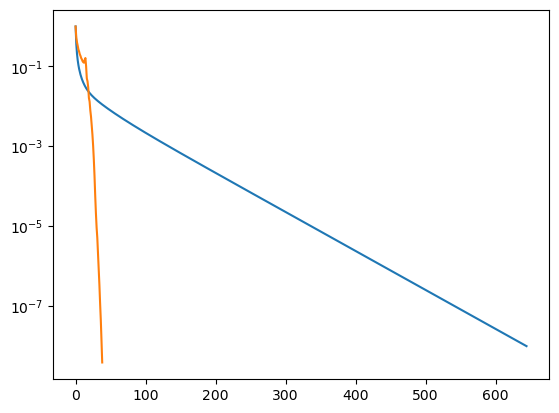

In [7]:
AT = A.T
autovalori = np.linalg.eigvals(A)
if (np.array_equal(A, AT)):
    print("Matrice A simmetrica")
if (np.all(autovalori) > 0):
    print("Tutti gli autovalori sono positivi")

n = A.shape[0]  #do per scontato che sia quadrata altrimeti dovrei controllare che A.shape[0]=A.shape[1]
x0 = np.zeros((n,1))
toll = 1e-8
itmax = 1000
solGS, it_GS, err_vet_GS = gauss_seidel(A,b,x0,toll,itmax)
print("it Gauss-Seidel", it_GS)
plt.semilogy(np.arange(it_GS), err_vet_GS)
solCG, err_vet_CG, sol_vet_CG, it_CG = conjugate_gradient(A,b,x0,itmax,toll)
print("it Conjugate Gradient", it_CG)
plt.semilogy(np.arange(it_CG+1), err_vet_CG)

## Esercizio 2

La sequenza 

$$x_1=1$$
$$x_n= 2^{n-1} \left( \sqrt{1+ \frac{x_{n-1}}{2^{n-2}} }-1 \right)    \quad \quad n=2,3,...,\quad (1) $$

converge a $log(2)$, cioè  $\lim_{n \rightarrow \infty} x_n= log(2)$

- Si calcolino i valori della sequenza (1) per $n=1,..,71$

- Costruire un grafico in cui nelle ascisse vi sia  il valore di $n=1,..,71$  e nelle ordinate il corrispondente valore di $x_n$ . 

- La successione converge a log(2)? In corrispondenza di quale $n$ si verifica un pessimo risultato? Spiegare alla luce della teoria

- Manipolando opportunamente la formula (1) scrivere una formula  equivalente  ma piu\' stabile per ottenere la sequenza $\tilde x_n$
algebricamente equivalente alla (1).

- Valutare la formula proposta per calcolare la sequenza $\tilde x_n $ per $n=1,..,71$

- Costruire un grafico in cui nelle ascisse vi sia  il valore di n  e nelle ordinate il corrispondente valore di $\tilde x_n$ 

- Calcolare l'errore relativo di ogni $x_n$ rispetto al valore esatto $log(2)$ 


- Calcolare l'errore relativo di ogni $\tilde x_n$ rispetto al valore esatto $log(2)$

## Esercizo 3
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``Dati1.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 


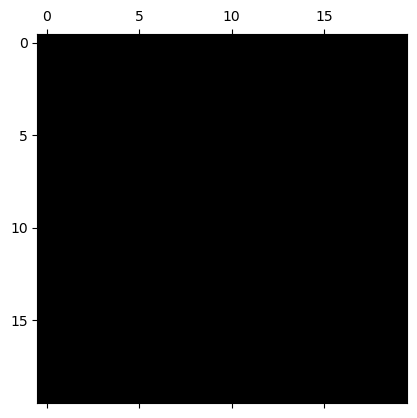

In [55]:
dati = loadmat('Dati1.mat')
A = dati["A"]
b = dati["b"]
#plt.spy(A)

In [77]:
AT = A.T
print(np.linalg.cond(A))
autovalori = np.linalg.eigvals(A)
if (not np.array_equal(A, AT)):
    print("Matrice A non simmetrica")
elif (np.all(autovalori) > 0):
    print("Tutti gli autovalori sono positivi")
m, n = A.shape
if (m < n or np.linalg.matrix_rank(A)!=n):
    print("Non posso utilizzare QR")
else:
    Q, R = np.linalg.qr(A)
    y = Q.T@b
    x, flag = rs.Usolve(R, y)

499.99999999999824
Matrice A non simmetrica
